In [1]:
import numpy as np
import pandas as pd

In [2]:
data_url = '/kaggle/input/impact-of-social-media-on-suicide-rates/social-media-impact-on-suicide-rates.csv'

In [3]:
df = pd.read_csv(data_url)
df.head()

,year,sex,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     30 non-null     int64  
 1   sex                                      30 non-null     object 
 2   Suicide Rate % change since 2010         30 non-null     float64
 3   Twitter user count % change since 2010   30 non-null     float64
 4   Facebook user count % change since 2010  30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


In [5]:
df.columns

Index(['year', 'sex', 'Suicide Rate % change since 2010',
       'Twitter user count % change since 2010',
       'Facebook user count % change since 2010'],
      dtype='object')

In [6]:
df.isnull().sum()

year                                       0
sex                                        0
Suicide Rate % change since 2010           0
Twitter user count % change since 2010     0
Facebook user count % change since 2010    0
dtype: int64

In [7]:
df.describe()

,year,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
count,30.000000,30.000000,30.000000,30.000000
mean,2014.500000,93.837274,462.777778,255.394737
std,2.921384,4.688130,177.734769,101.498351
min,2010.000000,85.269171,100.000000,100.000000
25%,2012.000000,89.530913,342.592593,173.684211
50%,2014.500000,94.478128,549.074074,245.394737
75%,2017.000000,98.051267,594.444444,350.164474
max,2019.000000,100.000000,629.629630,410.855263


<h1>Lets do Visulization</h1>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

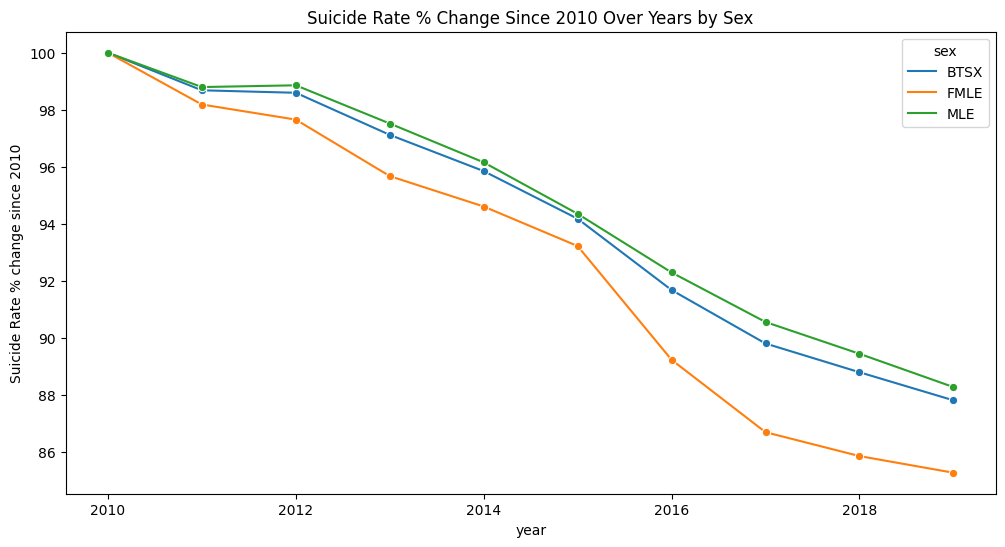

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='Suicide Rate % change since 2010', hue='sex', marker='o')
plt.title('Suicide Rate % Change Since 2010 Over Years by Sex')
plt.show()

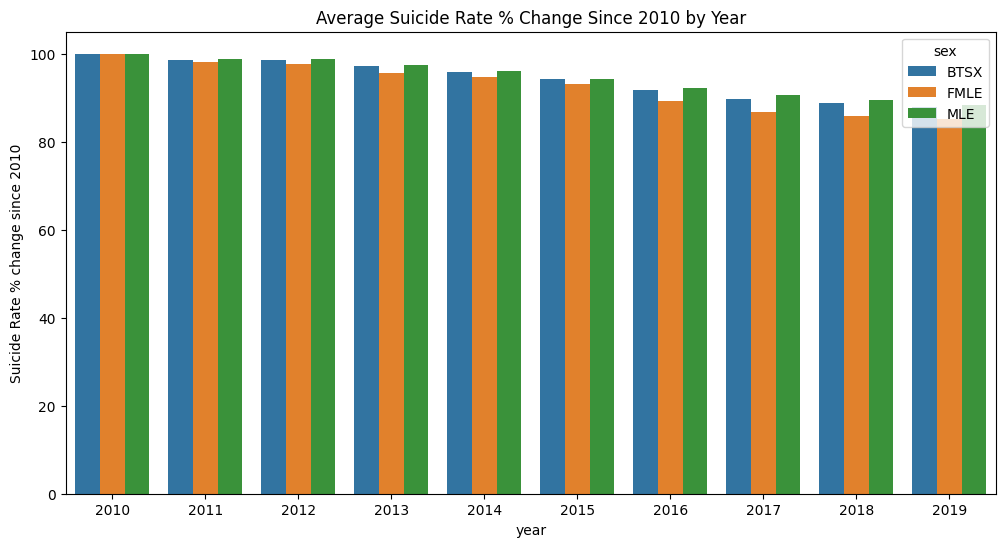

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='year', y='Suicide Rate % change since 2010', hue='sex', ci=None)
plt.title('Average Suicide Rate % Change Since 2010 by Year')
plt.show()

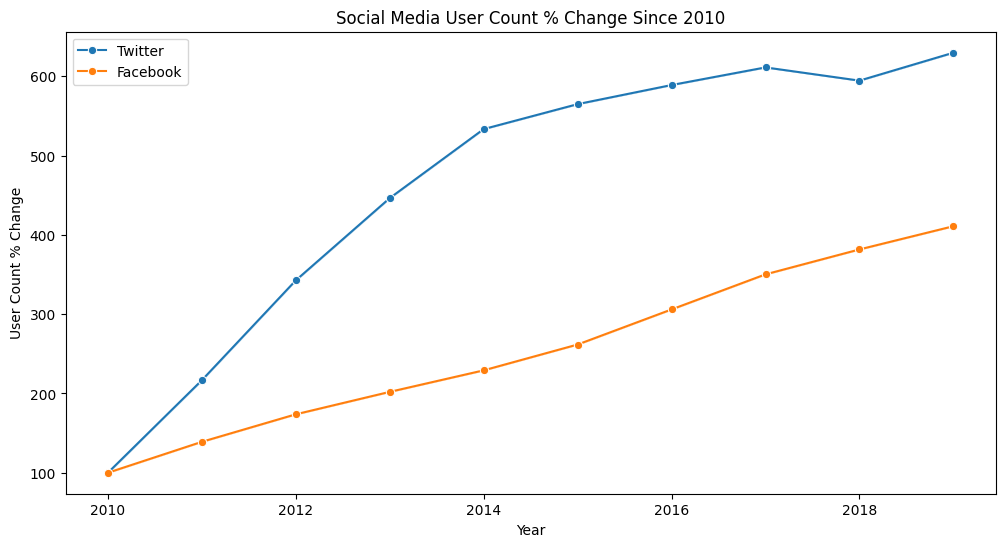

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='Twitter user count % change since 2010', label="Twitter", marker='o')
sns.lineplot(data=df, x='year', y='Facebook user count % change since 2010', label="Facebook", marker='o')
plt.title("Social Media User Count % Change Since 2010")
plt.xlabel("Year")
plt.ylabel("User Count % Change")
plt.legend()
plt.show()

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
df.columns

Index(['year', 'sex', 'Suicide Rate % change since 2010',
       'Twitter user count % change since 2010',
       'Facebook user count % change since 2010'],
      dtype='object')

In [14]:
df = df.rename(columns={
    "Suicide Rate % change since 2010": "total_suicide",
    "Twitter user count % change since 2010": "twitter_suicide",
    "Facebook user count % change since 2010": "facebook_suicide"
})
df

,year,sex,total_suicide,twitter_suicide,facebook_suicide
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263
5,2011,MLE,98.795530,216.666667,138.980263
6,2012,BTSX,98.595123,342.592593,173.684211
7,2012,FMLE,97.653750,342.592593,173.684211
8,2012,MLE,98.857511,342.592593,173.684211
9,2013,BTSX,97.119135,446.296296,201.973684


      total_suicide  twitter_suicide  facebook_suicide
year                                                  
2010     100.000000       100.000000        100.000000
2011      98.553733       216.666667        138.980263
2012      98.368794       342.592593        173.684211
2013      96.769635       446.296296        201.973684
2014      95.536406       533.333333        229.111842


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


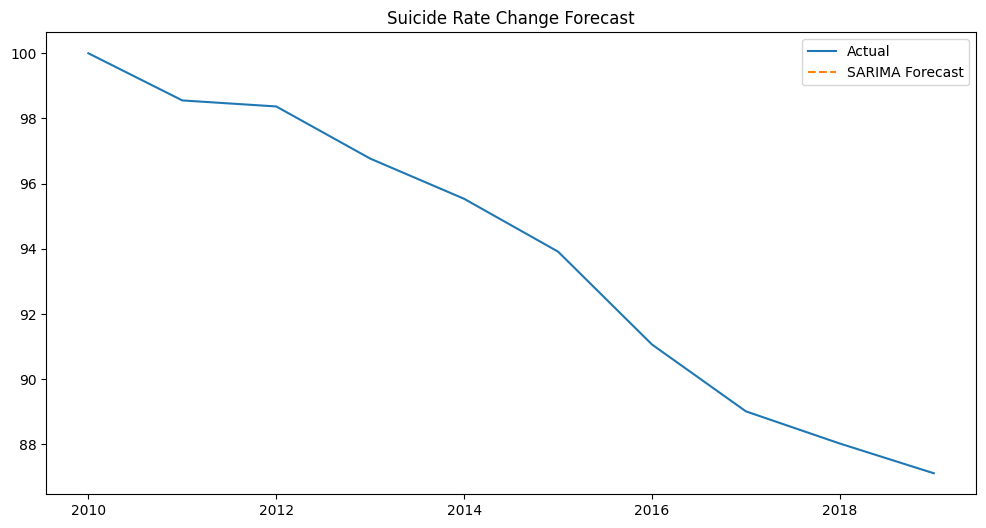

In [15]:
# Aggregate by year to observe yearly trends, selecting only numeric columns
yearly_data = df.groupby('year').mean(numeric_only=True)

# Check the result to ensure only numeric columns are included
print(yearly_data.head())

# SARIMA model for forecasting suicide rates
sarima_model = SARIMAX(yearly_data['total_suicide'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit(disp=False)
yearly_data['sarima_forecast'] = sarima_model.predict(start=1, end=len(yearly_data))

# Plotting actual vs forecasted suicide rate change
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['total_suicide'], label='Actual')
plt.plot(yearly_data['sarima_forecast'], label='SARIMA Forecast', linestyle='--')
plt.title("Suicide Rate Change Forecast")
plt.legend()
plt.show()

In [16]:
X = df[['twitter_suicide', 'facebook_suicide']]
y = df['total_suicide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)


R^2 Score: 0.9116286968526672
Mean Squared Error: 1.2292924562010334


In [17]:
y_pred

array([86.27992936, 93.69317705, 89.32551455, 93.69317705, 97.37193447,
       96.31091401])

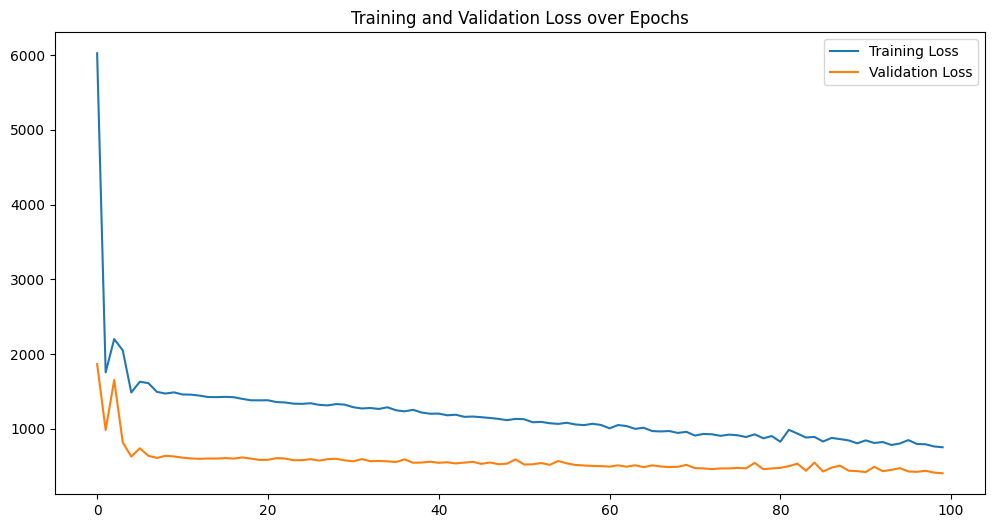

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 404.2816 - mae: 15.4112
Neural Network Mean Absolute Error: 15.411213874816895


In [18]:
model = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=4, verbose=0)

# Plotting training vs validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

loss, mae = model.evaluate(X_test, y_test)
print("Neural Network Mean Absolute Error:", mae)